# Analisis generarl de la serie de tiempo
Se crea una rutina de reportes para poder visualizar el estado de la serie temporal, la idea es comenzar desde el analisis general de la serie hasta el analisis especifico como analisis mensual y diario.
Con esto se pretende generar una serie de metricas para determinar que metodos de intermpolacion podemos utilizar para la imputacion de datos ausentes.

In [1]:
import kaleido
import ephem
import numpy as np
import pandas as pd
from utils.utils import reshample_time_serie, categorize_precipitation
from statistics_utils.eda.timeseries import decompose_time_series
#from graphics_utils.go import arrange_figures_in_subplots
from api_somo import fetch_and_process_data, fetch_qf


ImportError: cannot import name 'fetch_and_process_data' from 'api_somo' (d:\master BigData\01 proyecto final\codigos\bigdata\api_somo.py)

In [2]:
# PARAMETROS PARA OBTENER SERIE DE TIEMPO DESDE LA API SOMO
api_filtrate_seire = "http://127.0.0.1:8000/database/filter-serie-qf/"
params = {
        "station_name": "malpelo",
        "variable_name": "Precipitación acumulada",
        "processing_level_name": "Control de calidad"
        }
serie_historica = fetch_and_process_data(api_filtrate_seire, params)
#serie_historica.loc[serie_historica['qf'] != 1, 'value'] = np.nan
#serie_historica = reshample_time_serie(serie_historica, 'D', 'sum')
serie_historica = categorize_precipitation(serie_historica, params)
print(serie_historica.describe())


Columnas originales: Index(['date_time', 'sensor_data', 'quality_factor__quality_flag'], dtype='object')
Columnas después de renombrar: Index(['timestamp', 'value', 'qf'], dtype='object')
               value             qf          month
count  731807.000000  731807.000000  731807.000000
mean    -4052.049350       1.324431       6.557029
std     19717.744988       1.577627       3.431975
min    -99999.000000       1.000000       1.000000
25%         0.000000       1.000000       4.000000
50%         0.000000       1.000000       7.000000
75%         0.000000       1.000000      10.000000
max      1464.000000       9.000000      12.000000


---
# Analisis de la calidad de la serie Historica
En este grafico podemos ver el total de datos agrupados por calidad en cada mes, es decir si una serie tiene 15 años tiene 15 eneros, 15 noviembres etc, con esta grafica podemos ver a modo general con cuantos datos del total contamos para la recuperacion de la serie y los datos faltantes, esta grafica es muy importante porque nos da  un marcador de calidad historico por meses, incluso aqui se puede analizar si la perdida de datos es sistematica o si tiene algun comportamiento con correlacion temporal.

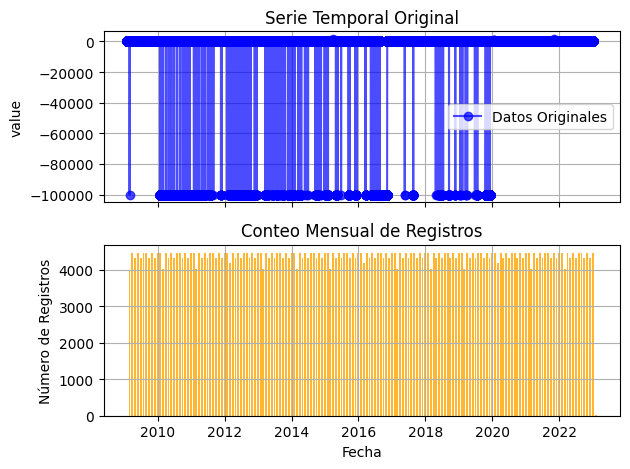

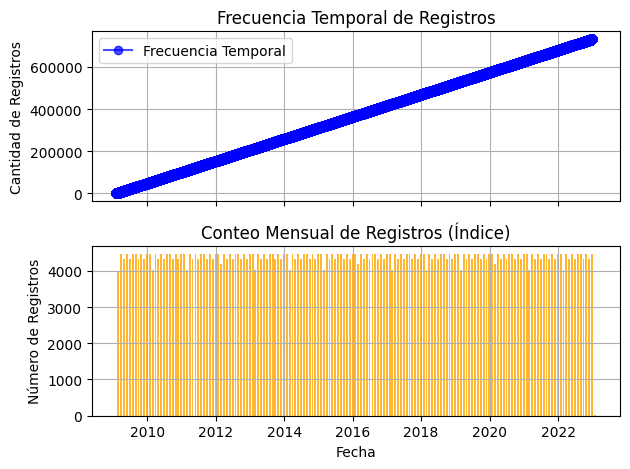

timestamp
2009-02-28 00:00:00+00:00    4001
2009-03-31 00:00:00+00:00    4464
2009-04-30 00:00:00+00:00    4320
2009-05-31 00:00:00+00:00    4464
2009-06-30 00:00:00+00:00    4320
                             ... 
2022-09-30 00:00:00+00:00    4320
2022-10-31 00:00:00+00:00    4464
2022-11-30 00:00:00+00:00    4320
2022-12-31 00:00:00+00:00    4464
2023-01-31 00:00:00+00:00      30
Freq: ME, Name: timestamp, Length: 168, dtype: int64


In [3]:
#serie_historica = serie_historica.loc['2009-02':'2009-03']
from utils.utils import _count, analyze_time_series, analyze_time_series_index
analyze = analyze_time_series(serie_historica)
report_index = analyze_time_series_index(serie_historica)
print(report_index)

In [1]:
from graphics_utils.express import fig_pie_month, fig_boxplot, fig_lineplot

print(serie_historica[serie_historica['qf'] == 9])


line_fig = fig_lineplot(serie_historica, params, color=None)
line_fig.show()
pie_fig = fig_pie_month(serie_historica, params)
pie_fig.show()
boxplot_fig = fig_boxplot(serie_historica, params, color='month')
boxplot_fig.show()

NameError: name 'serie_historica' is not defined

---
## Analisis de la calidad por años
Luego de tener una vision general de los datos, entonces veremos la calidad de la serie pero segmentada por años, en estos vamos a tomar la historica y realizaremos el grafico anterior pero aplicado a cada año, con el fin de comenzar a reconstuir el año que contenga la mayor cantidad de datos buenos.

In [5]:
serie_2020 = serie_historica.loc['2020']
"""serie_2021 = serie_historica.loc['2021']"""
print(serie_2020)
from graphics_utils import pie
# Agrupamos los datos por año
figs = {}  # Diccionario para almacenar las figuras por año
for año, serie in serie_2020.groupby(serie_2020.index.year):
    print(f"Año: {año}")
    line_fig = fig_lineplot(serie['value'], params)
    line_fig.show()
    # Generar la figura pie para el año actual
    report = pd.DataFrame()
    #pie_year_fig = fig_pie_chart_by_month(serie, params)
    #pie_year_fig.show()

NameError: name 'serie_2020' is not defined

In [ ]:
from graphics_utils.go import fig_pie_chart_by_month
from graphics_utils.express  import fig_lineplot
serie_ = serie_historica.loc['2009']
print(serie_2020)
line_fig = fig_lineplot(serie_['value'], params)
line_fig.show()
pie_fig = fig_pie_chart_by_month(serie_, params)
pie_fig.show()
boxplot_fig = fig_boxplot(serie_, params, color='month')
boxplot_fig.show()

NameError: name 'serie_historica' is not defined

: 

# Descomponer la serie temporal
Esta seccion se crea para hacer el procesamiento de descomposicion

In [ ]:
IS = decompose_time_series(insitu)

NameError: name 'insitu' is not defined